In [1]:
# import numpy and exp mat
import os
import numpy as np
import matplotlib.pyplot as plt

from module.QuantumSystem import SHOscillator
from module.Walker import MetropolisWalker
from module.Utils import VMC

np.random.seed(0)

# Spherical Harmonic Oscillator without interaction, with Metropolis and analytical hamiltonian
In this notebook we study we study the scaling of the execution time and the std of the mean energy (for an non optimal variational parameter) as function of the dimension of the system and the number of particles and fixed sampling steps.

## Time and error as function of N and D
After fixing $\alpha$ and the computational resources, we study the time of execution and the error on the mean for a non optimal value. In this way we study the performance of Metropolis algorithm with analytical hamiltonian as a integrator to be compared with other methods.

In [2]:
params = np.array([0.2])
warmup_steps = 50000
calibrate_steps = 50000
run_steps = 1000000

Ns = np.array([1, 2, 10, 20, 100, 200, 500])
Ds = np.array([1, 2, 3])

# energyes are a grid of energies for each N and D
energies = np.zeros((len(Ns), len(Ds)))
energies_std = np.zeros((len(Ns), len(Ds)))
times = np.zeros((len(Ns), len(Ds)))
                 

plot_dir = 'results/TimeScaling/'


# cicle on Ns and Ds and save
for i, N in enumerate(Ns):
    for j, D in enumerate(Ds):
        print('N:', N, 'D:', D)
        system = SHOscillator(N, D)
        walker = MetropolisWalker(system)
        # plot dir in the form plot_dir/N:N_D:D/
        plot_dir_temp = plot_dir+'N:'+str(N)+'_D:'+str(D)
        # if dir does not exist create it
        if not os.path.exists(plot_dir):
            os.makedirs(plot_dir)
        vmc = VMC(system, walker, params=params,    
                  warmup_steps=warmup_steps, run_steps=run_steps, 
                  calibrate_steps=calibrate_steps, acceptance_rate=0.3,
                  plot=False, plot_dir=plot_dir_temp,
                  verbose=True)
        vmc.warmup()
        vmc.calibrate()
        vmc.run()
        energies[i,j] = vmc.get_energy()
        energies_std[i,j] = vmc.get_energy_std()
        times[i,j] = vmc.get_run_time()

# save the results
np.save(plot_dir+'energies', energies)
np.save(plot_dir+'energies_std', energies_std)
np.save(plot_dir+'times', times)
np.save(plot_dir+'Ns', Ns)
np.save(plot_dir+'Ds', Ds)

N: 1 D: 1
-----------------
VMC warmup
-----------------
Parameters: [0.2]
Acceptance rate: 0.73108
-----------------
VMC calibrate
-----------------
delta: 3.814697265625
subgroup_size: 1
Acceptance rate: 0.289
-----------------
VMC run
-----------------
Parameters: [0.2]
Acceptance rate: 0.337902
Time:  0.8370645046234131
Energy: 0.7283879035164292 +/- 0.0017833080539376984
N: 1 D: 2
-----------------
VMC warmup
-----------------
Parameters: [0.2]
Acceptance rate: 0.5898
-----------------
VMC calibrate
-----------------
delta: 1.953125
subgroup_size: 1
Acceptance rate: 0.325
-----------------
VMC run
-----------------
Parameters: [0.2]
Acceptance rate: 0.342014
Time:  0.8825562000274658
Energy: 1.4526827302688492 +/- 0.0031024407529137463
N: 1 D: 3
-----------------
VMC warmup
-----------------
Parameters: [0.2]
Acceptance rate: 0.49288
-----------------
VMC calibrate
-----------------
delta: 1.5625
subgroup_size: 1
Acceptance rate: 0.214
-----------------
VMC run
-----------------
P

Text(0.5, 1.0, 'Execution time')

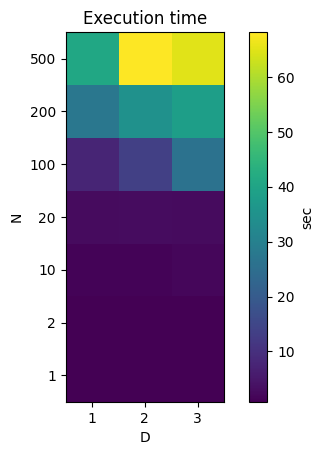

In [4]:
# show the time scaling usign a matrix
plt.figure()
plt.gca().set_aspect('equal', adjustable='box')

plt.imshow(times, origin='lower')
# add the axis
plt.xticks(np.arange(len(Ds)), Ds)
plt.yticks(np.arange(len(Ns)), Ns)
# add the colorbar with units [sec]
plt.colorbar(label='sec')
plt.xlabel('D')
plt.ylabel('N')
plt.title('Execution time')

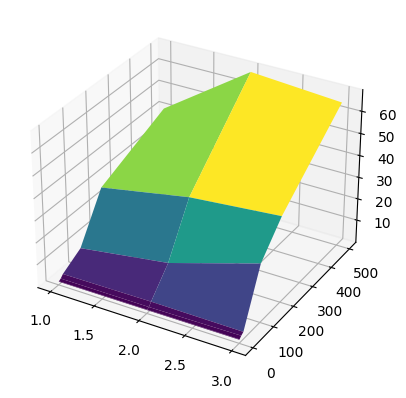

In [5]:
# show in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(Ds, Ns)
ax.plot_surface(X, Y, times, cmap='viridis')
